In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas
import os
import shutil
import string
import random

def get_bbox_from_mask(mask):

    seg_value = 1

    if mask is not None:
        np_seg = np.array(mask)
        segmentation = np.where(np_seg == seg_value)

        # Bounding Box
        bbox = 0, 0, 0, 0
        if len(segmentation) != 0 and len(segmentation[1]) != 0 and len(segmentation[0]) != 0:
            x_min = int(np.min(segmentation[1]))
            x_max = int(np.max(segmentation[1]))
            y_min = int(np.min(segmentation[0]))
            y_max = int(np.max(segmentation[0]))
            bbox = x_min, y_min, x_max, y_max
            return bbox
        
        return None
    else:
        # Handle error case where segmentation image cannot be read or is empty
        print("Error: Segmentation image could not be read or is empty.")
        return None


def get_data_from_gallery(path):

    try:
        mask = plt.imread(path)
    except FileNotFoundError:
        print(f"Warning: File not found - {path}")
        return None

    x_min, y_min, x_max, y_max = get_bbox_from_mask(mask)
    if x_min is None or y_min is None or x_max is None or y_max is None:
        # Si no se puede calcular la bounding box, retorna None
        print(f"Warning: Unable to calculate bounding box for - {path}")
        return None
    
    height = y_max - y_min
    width = x_max - x_min
    area = cv2.countNonZero(mask)

    return {
        'heigth':height,
        'width':width,
        'area':area,
    }
    

71 103 4257


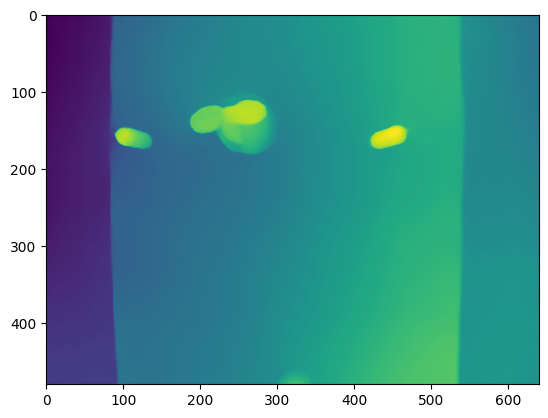

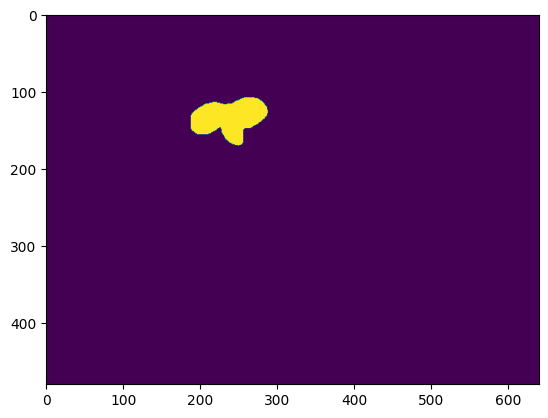

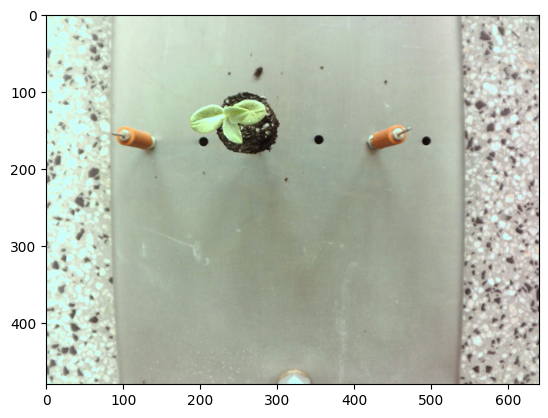

In [11]:
type = 'vertical'
img = plt.imread(f"../gallery_24_03_23/{type}/rgb/seedlings_{1}_{4}.jpg")
depth = plt.imread(f"../gallery_24_03_23/{type}/depth/seedlings_{1}_{4}.jpg")
mask = plt.imread(f"../gallery_24_03_23/{type}/mask/seedlings_mask_{1}_{4}.jpg")

x_min, y_min, x_max, y_max = get_bbox_from_mask(mask)

vertical_height = y_max - y_min
vertical_width = x_max - x_min
vertical_area = cv2.countNonZero(mask)

print(vertical_height, vertical_width, vertical_area)

plt.imshow(depth)
plt.show()
plt.imshow(mask)
plt.show()
plt.imshow(img)
plt.show()


In [11]:
dataset ={
    'vertical_area': [],
    'vertical_heigth': [],
    'vertical_width': [],
    'horizontal_area': [],
    'horizontal_heigth': [],
    'horizontal_width': [],
    'vertical_mask_path': [],
    'horizontal_mask_path': []
}

type = 'vertical'
path = f"../gallery_24_03_23/{type}/mask/seedlings_mask_{1}_{5}.jpg"
data = get_data_from_gallery(path)
dataset[f'{type}_area'].append(data['area'])
dataset[f'{type}_width'].append(data['width'])
dataset[f'{type}_heigth'].append(data['heigth'])
dataset[f'{type}_mask_path'].append(path)

type = 'horizontal'
path = f"../gallery_24_03_23/{type}/mask/seedlings_mask_{1}_{5}.jpg"
data = get_data_from_gallery(path)
dataset[f'{type}_area'].append(data['area'])
dataset[f'{type}_width'].append(data['width'])
dataset[f'{type}_heigth'].append(data['heigth'])
dataset[f'{type}_mask_path'].append(path)

dataframe = pandas.DataFrame(dataset)
dataframe.to_csv('dataseed.csv', index=False)

dataframe

KeyboardInterrupt: 

In [ ]:
folders_to_include = [
    "gallery_03_03_23_tray1",
    "gallery_03_03_23_tray2",
    "gallery_17_03_23",
    "gallery_24_03_23",
    "gallery_31_03_23"
]

dataset = {
    'vertical_area': [],
    'vertical_heigth': [],
    'vertical_width': [],
    'horizontal_area': [],
    'horizontal_heigth': [],
    'horizontal_width': [],
    'vertical_mask_path': [],
    'horizontal_mask_path': [],
    'vertical_rgb_path': [],
    'horizontal_rgb_path': [],
    'vertical_depth_path': [],
    'horizontal_depth_path': []
}
for folder in folders_to_include:
    folder_path = f"../{folder}/"

    for x in range(1,13):
        for y in range(1,7):
            for image_type in ['vertical', 'horizontal']:
                path = f"{folder_path}{image_type}/mask/seedlings_mask_{x}_{y}.jpg"
                data = get_data_from_gallery(path)
                if data:
                    dataset[f'{image_type}_area'].append(data['area'])
                    dataset[f'{image_type}_width'].append(data['width'])
                    dataset[f'{image_type}_heigth'].append(data['heigth'])
                    dataset[f'{image_type}_mask_path'].append(path)
            
                path = f"{folder_path}{image_type}/rgb/seedlings_{x}_{y}.jpg"  
                if data:
                    dataset[f'{image_type}_rgb_path'].append(path)

                path = f"{folder_path}{image_type}/depth/seedlings_{x}_{y}.jpg"  
                if data:
                    dataset[f'{image_type}_depth_path'].append(path)

dataframe = pandas.DataFrame(dataset)
dataframe.to_csv('dataseed.csv', index=False)

dataframe

,vertical_area,vertical_heigth,vertical_width,horizontal_area,horizontal_heigth,horizontal_width,vertical_mask_path,horizontal_mask_path,vertical_rgb_path,horizontal_rgb_path,vertical_depth_path,horizontal_depth_path
0,6284,119,79,6390,150,87,../gallery_03_03_23_tray1/vertical/mask/seedli...,../gallery_03_03_23_tray1/horizontal/mask/seed...,../gallery_03_03_23_tray1/vertical/rgb/seedlin...,../gallery_03_03_23_tray1/horizontal/rgb/seedl...,../gallery_03_03_23_tray1/vertical/depth/seedl...,../gallery_03_03_23_tray1/horizontal/depth/see...
1,14398,167,151,5332,127,85,../gallery_03_03_23_tray1/vertical/mask/seedli...,../gallery_03_03_23_tray1/horizontal/mask/seed...,../gallery_03_03_23_tray1/vertical/rgb/seedlin...,../gallery_03_03_23_tray1/horizontal/rgb/seedl...,../gallery_03_03_23_tray1/vertical/depth/seedl...,../gallery_03_03_23_tray1/horizontal/depth/see...
2,13696,159,159,6085,143,95,../gallery_03_03_23_tray1/vertical/mask/seedli...,../gallery_03_03_23_tray1/horizontal/mask/seed...,../gallery_03_03_23_tray1/vertical/rgb/seedlin...,../gallery_03_03_23_tray1/horizontal/rgb/seedl...,../gallery_03_03_23_tray1/vertical/depth/seedl...,../gallery_03_03_23_tray1/horizontal/depth/see...
3,12697,167,143,5123,119,79,../gallery_03_03_23_tray1/vertical/mask/seedli...,../gallery_03_03_23_tray1/horizontal/mask/seed...,../gallery_03_03_23_tray1/vertical/rgb/seedlin...,../gallery_03_03_23_tray1/horizontal/rgb/seedl...,../gallery_03_03_23_tray1/vertical/depth/seedl...,../gallery_03_03_23_tray1/horizontal/depth/see...
4,13367,127,207,5366,119,119,../gallery_03_03_23_tray1/vertical/mask/seedli...,../gallery_03_03_23_tray1/horizontal/mask/seed...,../gallery_03_03_23_tray1/vertical/rgb/seedlin...,../gallery_03_03_23_tray1/horizontal/rgb/seedl...,../gallery_03_03_23_tray1/vertical/depth/seedl...,../gallery_03_03_23_tray1/horizontal/depth/see...
...,...,...,...,...,...,...,...,...,...,...,...,...
247,10404,159,119,4300,103,63,../gallery_31_03_23/vertical/mask/seedlings_ma...,../gallery_31_03_23/horizontal/mask/seedlings_...,../gallery_31_03_23/vertical/rgb/seedlings_11_...,../gallery_31_03_23/horizontal/rgb/seedlings_1...,../gallery_31_03_23/vertical/depth/seedlings_1...,../gallery_31_03_23/horizontal/depth/seedlings...
248,13690,159,231,5605,111,119,../gallery_31_03_23/vertical/mask/seedlings_ma...,../gallery_31_03_23/horizontal/mask/seedlings_...,../gallery_31_03_23/vertical/rgb/seedlings_11_...,../gallery_31_03_23/horizontal/rgb/seedlings_1...,../gallery_31_03_23/vertical/depth/seedlings_1...,../gallery_31_03_23/horizontal/depth/seedlings...
249,7286,103,135,3894,95,71,../gallery_31_03_23/vertical/mask/seedlings_ma...,../gallery_31_03_23/horizontal/mask/seedlings_...,../gallery_31_03_23/vertical/rgb/seedlings_12_...,../gallery_31_03_23/horizontal/rgb/seedlings_1...,../gallery_31_03_23/vertical/depth/seedlings_1...,../gallery_31_03_23/horizontal/depth/seedlings...
250,3035,63,87,3724,95,63,../gallery_31_03_23/vertical/mask/seedlings_ma...,../gallery_31_03_23/horizontal/mask/seedlings_...,../gallery_31_03_23/vertical/rgb/seedlings_12_...,../gallery_31_03_23/horizontal/rgb/seedlings_1...,../gallery_31_03_23/vertical/depth/seedlings_1...,../gallery_31_03_23/horizontal/depth/seedlings...


In [13]:
import shutil
import os
import string
import random
import uuid

# ruta_origen = "/home/desser29/catkin_ws/dataseed/gallery_03_03_23_tray1/horizontal/rgb"
# ruta_destino = "/home/desser29/catkin_ws/dataseed/dataset/horizontal/rgb"

# if not os.path.exists(ruta_destino):
#     print(f"Error: La carpeta de destino {ruta_destino} no existe.")
#     exit()

# for filename in os.listdir(ruta_origen):
#     if filename.endswith(".jpg"):
#         src = os.path.join(ruta_origen, filename)
#         dst = os.path.join(ruta_destino, filename)
#         shutil.copy(src, dst)

# count = 0
# for filename in os.listdir(ruta_destino):
#     if filename.endswith(".jpg"):
#         src = os.path.join(ruta_destino, filename)
#         dst = os.path.join(ruta_destino, f"rgb_{count}.jpg")
#         os.rename(src, dst)
#         count += 1



def copy_and_rename(src_folder, dst_folder, prefix):
    if not os.path.exists(dst_folder):
        print(f"Error: La carpeta de destino {dst_folder} no existe.")
        exit()

    files = [f for f in os.listdir(src_folder) if f.endswith(".jpg")]
    for filename in files:
        src = os.path.join(src_folder, filename)
        unico_name = f"{prefix}_{str(uuid.uuid4())[:8]}.jpg"
        dst = os.path.join(dst_folder, unico_name)
        shutil.copy(src, dst)

folder_to_read= [
    "gallery_03_03_23_tray1",
    "gallery_03_03_23_tray2",
    "gallery_17_03_23",
    "gallery_24_03_23",
    "gallery_31_03_23",
]

for folder_name in folder_to_read:
    folder_total = f"{folder_name}"
    
    ruta_origen_A = f"/home/desser29/catkin_ws/dataseed/{folder_total}/horizontal/rgb"
    ruta_origen_B = f"/home/desser29/catkin_ws/dataseed/{folder_total}/vertical/rgb"

    ruta_destino_C = "/home/desser29/catkin_ws/dataseed/dataset/horizontal/rgb"
    ruta_destino_D = "/home/desser29/catkin_ws/dataseed/dataset/vertical/rgb"

    print(f"Copying and renaming from {ruta_origen_A} to {ruta_destino_C}...")
    copy_and_rename(ruta_origen_A, ruta_destino_C, "rgb_h")

    print(f"Copying and renaming from {ruta_origen_B} to {ruta_destino_D}...")
    copy_and_rename(ruta_origen_B, ruta_destino_D, "rgb_v")

print("Completed Process.")

Copying and renaming from /home/desser29/catkin_ws/dataseed/gallery_03_03_23_tray1/horizontal/rgb to /home/desser29/catkin_ws/dataseed/dataset/horizontal/rgb...
Copying and renaming from /home/desser29/catkin_ws/dataseed/gallery_03_03_23_tray1/vertical/rgb to /home/desser29/catkin_ws/dataseed/dataset/vertical/rgb...
Copying and renaming from /home/desser29/catkin_ws/dataseed/gallery_03_03_23_tray2/horizontal/rgb to /home/desser29/catkin_ws/dataseed/dataset/horizontal/rgb...
Copying and renaming from /home/desser29/catkin_ws/dataseed/gallery_03_03_23_tray2/vertical/rgb to /home/desser29/catkin_ws/dataseed/dataset/vertical/rgb...
Copying and renaming from /home/desser29/catkin_ws/dataseed/gallery_17_03_23/horizontal/rgb to /home/desser29/catkin_ws/dataseed/dataset/horizontal/rgb...
Copying and renaming from /home/desser29/catkin_ws/dataseed/gallery_17_03_23/vertical/rgb to /home/desser29/catkin_ws/dataseed/dataset/vertical/rgb...
Copying and renaming from /home/desser29/catkin_ws/datasee